### Goal: pick 4 USA women's Gymnasts. Gymnasts cannot compete on the same appartaus more than once. And each apparatus needs to be competed on 3 times each, then get the largest sum of the top 3 out of 4 scores on each of the 4 apparatus. 


# Tabu Search

### IAA

Selected Athletes:
['jade carey' 'jordan chiles' 'shilese jones' 'simone biles']
Total Score:
171.33725


### Apparatus

Selected Athletes:
['jade carey' 'konnor mcclain' 'shilese jones' 'simone biles']
Total Score:
170.79811666666666


#  Variable Neighborhood Search (VNS):


### IAA

Selected Athletes:
['shilese jones' 'simone biles' 'jordan chiles' 'jade carey']
Total Score:
171.47074999999998

### Apparatus

Selected Athletes:
['simone biles' 'leanne wong' 'konnor mcclain' 'kayla dicello']
Total Score:
166.038475


# Hyper-Heuristics

### IAA

Best Selection: ['skye blakely' 'jade carey' 'shilese jones' 'simone biles']
Best Score: 169.963


### Apparatus

Best Selection: ['christiane popovich' 'ashlee sullivan' 'shilese jones' 'simone biles']
Best Score: 166.26328333333333



# Brute Force

### IAA

Selected Athletes:
['jade carey', 'jordan chiles', 'shilese jones', 'simone biles']
Maximum Score:
169.96300000000002

### Apparatus

Selected Athletes:
['addison fatta', 'jade carey', 'shilese jones', 'simone biles']
Maximum Score:
169.12011666666666


# Mixed-Integer Linear Programming (MILP) 

### IAA
Selected Gymnasts:
jade carey
jordan chiles
shilese jones
simone biles

### Apparatus
Selected Gymnasts:
camryn richardson
chloe cho
emjae frazier
simone biles

---

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [101]:
import pandas as pd
import re

data = {
    'Algorithm': ['Tabu Search', 'Tabu Search', 'Variable Neighborhood Search (VNS)', 'Variable Neighborhood Search (VNS)',
                   'Hyper-Heuristics', 'Hyper-Heuristics', 'Brute Force', 'Brute Force'],
    'IAA/Apparatus': ['IAA', 'Apparatus', 'IAA', 'Apparatus', 'IAA', 'Apparatus', 'IAA', 'Apparatus'],
    'Selected Athletes': [
        "['jade carey' 'jordan chiles' 'shilese jones' 'simone biles']",
        "['jade carey' 'konnor mcclain' 'shilese jones' 'simone biles']",
        "['shilese jones' 'simone biles' 'jordan chiles' 'jade carey']",
        "['simone biles' 'leanne wong' 'konnor mcclain' 'kayla dicello']",
        "['skye blakely' 'jade carey' 'shilese jones' 'simone biles']",
        "['christiane popovich' 'ashlee sullivan' 'shilese jones' 'simone biles']",
        "['jade carey', 'jordan chiles', 'shilese jones', 'simone biles']",
        "['addison fatta', 'jade carey', 'shilese jones', 'simone biles']"
    ],
    'Total Score/Maximum Score': [171.33725, 170.79811666666666, 171.47074999999998, 166.038475, 169.963, 166.26328333333333, 169.96300000000002, 169.12011666666666]
}

result_df = pd.DataFrame(data)

# Extract athlete names using regular expressions
result_df['Selected Athletes'] = result_df['Selected Athletes'].apply(lambda x: re.findall(r"'(.*?)'", x))

# Flatten the list of athletes and create a Series
athletes_series = pd.Series([athlete for athletes_list in result_df['Selected Athletes'] for athlete in athletes_list])

# Get the count of each athlete
athlete_counts = athletes_series.value_counts()

print(athlete_counts)


simone biles           8
shilese jones          7
jade carey             6
jordan chiles          3
konnor mcclain         2
leanne wong            1
kayla dicello          1
skye blakely           1
christiane popovich    1
ashlee sullivan        1
addison fatta          1
Name: count, dtype: int64


In [106]:
df=result_df.copy()

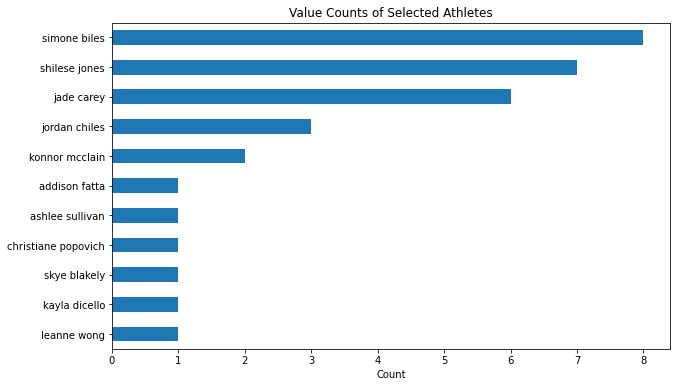

In [107]:
# Flatten the 'Selected Athletes' column
athletes_flat = [athlete for sublist in df['Selected Athletes'] for athlete in sublist]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
pd.Series(athletes_flat).value_counts().sort_values(ascending=True).plot(kind='barh', ax=ax)

ax.set_xlabel('Count')
ax.set_title('Value Counts of Selected Athletes')

plt.show()

In [116]:
df = df.sort_values(by='Total Score/Maximum Score', ascending=False)

In [119]:
df = df.reset_index(drop=True) 

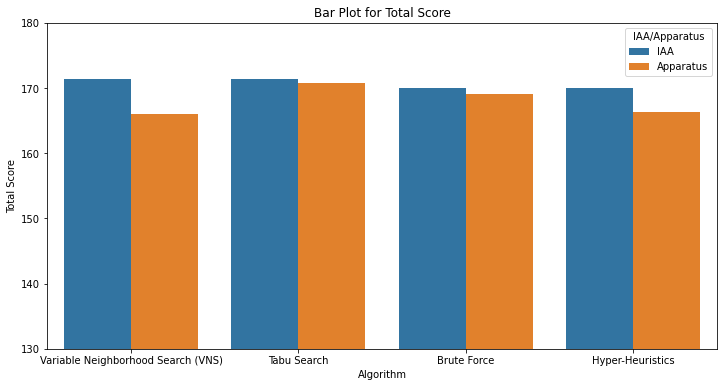

In [118]:
# Bar Plot for Total Score
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Algorithm', y='Total Score/Maximum Score', hue='IAA/Apparatus', data=df)
plt.title('Bar Plot for Total Score')
plt.xlabel('Algorithm')
plt.ylabel('Total Score')

# Set y-axis to start at 150
ax.set_ylim(130, ax.get_ylim()[1])

plt.show()



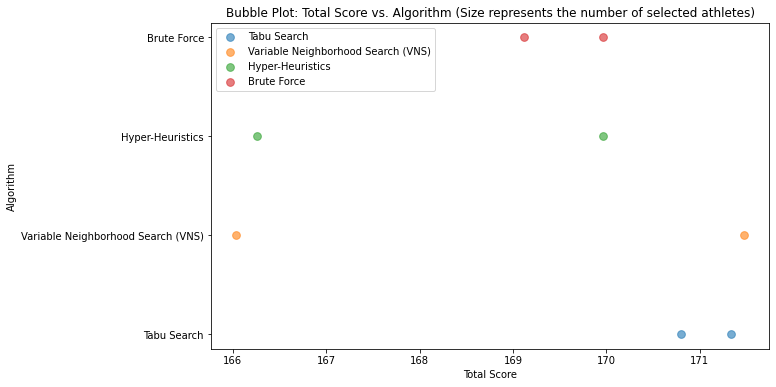

In [114]:
# Bubble Plot
plt.figure(figsize=(10, 6))
for i, algorithm in enumerate(df['Algorithm'].unique()):
    subset = df[df['Algorithm'] == algorithm]
    plt.scatter(subset['Total Score/Maximum Score'], subset['Algorithm'], s=len(subset['Selected Athletes']) * 30, alpha=0.6, label=algorithm)

plt.xlabel('Total Score')
plt.ylabel('Algorithm')
plt.title('Bubble Plot: Total Score vs. Algorithm (Size represents the number of selected athletes)')
plt.legend()
plt.show()



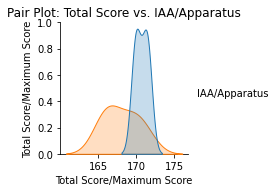

In [115]:
# Pair Plot
sns.pairplot(df, hue='IAA/Apparatus', vars=['Total Score/Maximum Score'])
plt.title('Pair Plot: Total Score vs. IAA/Apparatus')
plt.show()

In [123]:
top5=df.iloc[:5]

In [124]:
top5

,Algorithm,IAA/Apparatus,Selected Athletes,Total Score/Maximum Score
0,Variable Neighborhood Search (VNS),IAA,"[shilese jones, simone biles, jordan chiles, j...",171.470750
1,Tabu Search,IAA,"[jade carey, jordan chiles, shilese jones, sim...",171.337250
2,Tabu Search,Apparatus,"[jade carey, konnor mcclain, shilese jones, si...",170.798117
3,Brute Force,IAA,"[jade carey, jordan chiles, shilese jones, sim...",169.963000
4,Hyper-Heuristics,IAA,"[skye blakely, jade carey, shilese jones, simo...",169.963000


In [125]:
athletes_series = pd.Series([athlete for athletes_list in top5['Selected Athletes'] for athlete in athletes_list])

# Get the count of each athlete
top5list = athletes_series.value_counts()


In [126]:
top5list

shilese jones     5
simone biles      5
jade carey        5
jordan chiles     3
konnor mcclain    1
skye blakely      1
Name: count, dtype: int64